In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [5]:
episode   = None
episode_name = None
season    = None
scene     = None
character = None
dialogue  = None

num_lines = sum(1 for line in open('./data/all_scripts.txt'))
count     = 0

list_of_rows = None

for line in open('./data/all_scripts.txt'):
    count += 1
    print('advancment: %f '%((count/num_lines)*100), end = '\r')
    if line.startswith('>> '):
        episode   = line.split('>> ')[1]
        season    = episode.split(' Episode')[0]
        episode_name = episode.split('– ')[1]
        episode      = episode.split(season + ' ')[1].split('–')[0]
        scene        = None
        character    = None
        dialogue     = None
    if line.startswith('> '):
        scene = line.split('> ')[1]
    if not line.startswith('> ') and not line.startswith('>> '):
        character = line.split(': ')[0]
        dialogue  = line.split(': ')[1]
    
    if episode is not None and scene is not None and character is not None and dialogue is not None:
        if list_of_rows is None:
            list_of_rows = [[season, episode, episode_name,  scene, character, dialogue]]
        else:
            list_of_rows.append([season, episode, episode_name,  scene, character, dialogue])
        
        
script_df = pd.DataFrame(list_of_rows)
    

In [6]:
script_df.columns = ['season', 'episode_nb', 'episode_name', 'scene', 'character', 'dialogue']
script_df.head()

,season,episode_nb,episode_name,scene,character,dialogue
0,Series 01,Episode 01,Pilot Episode\n,A corridor at a sperm bank.\n,Sheldon,So if a photon is directed through a plane wit...
1,Series 01,Episode 01,Pilot Episode\n,A corridor at a sperm bank.\n,Leonard,"Agreed, what’s your point?\n"
2,Series 01,Episode 01,Pilot Episode\n,A corridor at a sperm bank.\n,Sheldon,"There’s no point, I just think it’s a good ide..."
3,Series 01,Episode 01,Pilot Episode\n,A corridor at a sperm bank.\n,Leonard,Excuse me?\n
4,Series 01,Episode 01,Pilot Episode\n,A corridor at a sperm bank.\n,Receptionist,Hang on.\n


In [92]:
grouped = script_df.groupby('season')['scene'].nunique()
print('The number of scenes for each season (Scene 01, 02, ...) is summarized in the following table:')
grouped = pd.DataFrame(grouped)
grouped.columns = ['nb_scenes']
display(grouped)

The number of scenes for each season (Scene 01, 02, ...) is summarized in the following table:


,nb_scenes
season,
Series 01,139
Series 02,159
Series 03,124
Series 04,131
Series 05,134
Series 06,127
Series 07,114
Series 08,107
Series 09,89


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [8]:
grouped_dialogue = script_df.copy()
grouped_dialogue['nb_dialogue_lines_character'] = grouped_dialogue.groupby('character')['dialogue'].transform('count')
grouped_dialogue = grouped_dialogue[grouped_dialogue['nb_dialogue_lines_character'] > 90]
grouped_dialogue['nb_seasons_character'] = grouped_dialogue.groupby('character')['season'].transform('count')
grouped_dialogue = grouped_dialogue[grouped_dialogue['nb_seasons_character'] > 1]
recurrent_characters = grouped_dialogue.character.unique().tolist()
print('There are %.0f recurrent characters \n'%(len(recurrent_characters)))
print(recurrent_characters)
print('\nHowever, Man is not a character! The cleaned list of recurrent characters is:\n')
recurrent_characters.remove('Man')
print(recurrent_characters)
print('\n--> %.0f unique recurrent characters are present'%(len(recurrent_characters)))

There are 20 recurrent characters 

['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Man', 'Mrs Cooper', 'Leslie', 'Kripke', 'Beverley', 'Stuart', 'Bernadette', 'Wil', 'Mrs Wolowitz', 'Zack', 'Amy', 'Priya', 'Arthur', 'Bert', 'Emily']

However, Man is not a character! The cleaned list of recurrent characters is:

['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Mrs Cooper', 'Leslie', 'Kripke', 'Beverley', 'Stuart', 'Bernadette', 'Wil', 'Mrs Wolowitz', 'Zack', 'Amy', 'Priya', 'Arthur', 'Bert', 'Emily']

--> 19 unique recurrent characters are present


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [9]:

for i in EXCLUDE_CHARS:
    script_df.dialogue = script_df.dialogue.apply(lambda x: x.replace(i, ' '))
script_df.dialogue = script_df.dialogue.str.lower()
# remove \n
script_df.dialogue = script_df.dialogue.apply(lambda x: x.replace('\n', ''))
script_df.scene    = script_df.scene.apply(lambda x: x.replace('\n', ''))
script_df.episode_name	 = script_df.episode_name	.apply(lambda x: x.replace('\n', ''))



print('The cleaned dataframe is:\n')
script_df.head()


The cleaned dataframe is:



,season,episode_nb,episode_name,scene,character,dialogue
0,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point
2,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me
4,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Receptionist,hang on


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [10]:
merged_dialogues = ''
for _, row in script_df.iterrows():
    merged_dialogues += ' ' + row.dialogue

In [11]:
wordlist     = merged_dialogues.split()
unique_words = list(set(wordlist))

print('In total there are %.0f words, but only %.0f re unique\n'%(len(wordlist), len(unique_words)))

wordfreq = [wordlist.count(w) for w in unique_words]

In total there are 653527 words, but only 21631 re unique



In [12]:
# sort the unique words by the number of count and print the first 15
dict_corpus_freq = dict(list(zip(unique_words, wordfreq)))
sorted_dict      = [(dict_corpus_freq[key], key) for key in dict_corpus_freq]
sorted_dict.sort()
sorted_dict.reverse()
print('The most common words and the associated count numbers in the entire series are:')
for i in range(15):
    print(sorted_dict[i])

The most common words and the associated count numbers in the entire series are:
(27638, 'i')
(25535, 'you')
(16584, 'the')
(15758, 'to')
(14950, 'a')
(13328, 's')
(12257, 'it')
(9679, 'and')
(9463, 'that')
(8360, 't')
(7991, 'of')
(6251, 'in')
(5973, 'is')
(5775, 'we')
(5665, 'what')


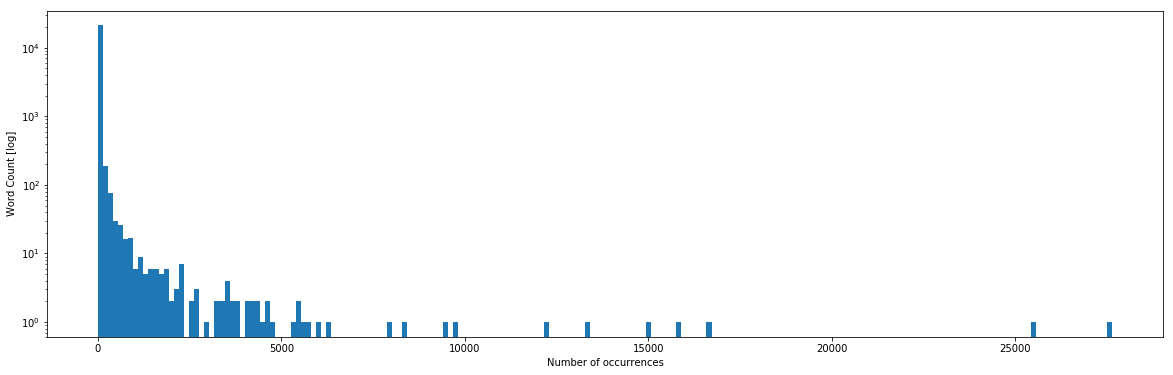

In [13]:
plt.figure(figsize = (20, 6))
plt.hist(wordfreq, bins = 200)
plt.xlabel('Number of occurrences')
plt.ylabel('Word Count [log]')
plt.yscale('log')
#plt.xscale('log')
plt.show()

Most of the words appear a very large number of time. Those are the stopwords but not only. In fact, when the punctuation marks are removed, expression as "it's" become "it s". Therefore, single characters like s are also highly present. But those are part of the stopwords, we do not remove them here!

The appropriate visualization scale is logarithmic for the y-axis. It is not strictly necessary to also apply a logarithmic scale on the x-axis.

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [78]:
tot_words_by_char = []
for r in recurrent_characters:
    merged_dialogues_tmp = ''
    df_tmp = script_df[script_df.character == r]
    for _, row in df_tmp.iterrows():
        merged_dialogues += ' ' + row.dialogue
    words_tmp = merged_dialogues.split()
    # do not remove stopwords here
    #words_tmp    = [w for w in words_tmp if len(w) > 1]
    nb_words_tmp = len(words_tmp)
    tot_words_by_char = np.append(tot_words_by_char, nb_words_tmp)

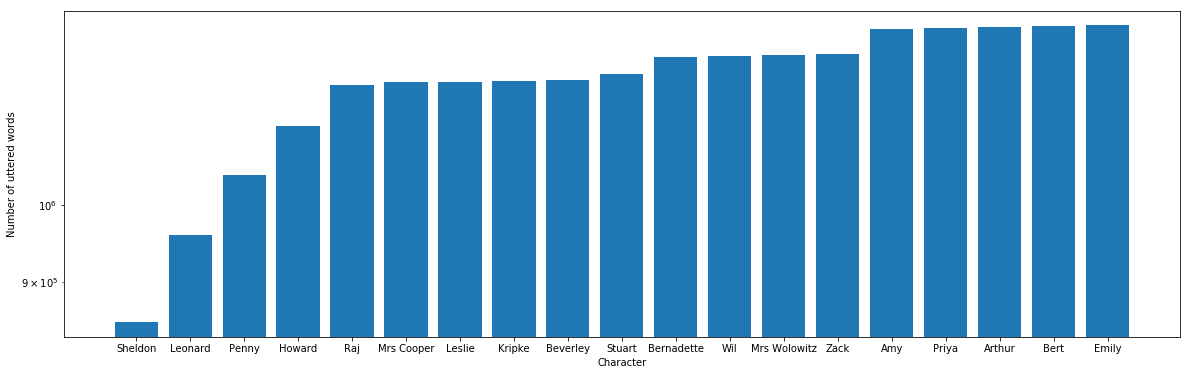

In [79]:
plt.figure(figsize = (20, 6))
plt.bar(recurrent_characters, tot_words_by_char)
plt.xlabel('Character')
plt.ylabel('Number of uttered words')
plt.yscale('log')
plt.show()

--> It seems that the most talkative character is Emily!

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [80]:
# see next code block for simpler way

list_statistics = None
for i in script_df.episode_nb.unique().tolist():
    for j in recurrent_characters:
        df_tmp = script_df[(script_df.episode_nb == i) & (script_df.character == j)]
        merged_dialogues_tmp = ''
        for _, row in df_tmp.iterrows():
            merged_dialogues_tmp += ' ' + row.dialogue
            
        words_tmp = merged_dialogues_tmp.split()
        # do not remove stopwords here
        # as explained before, filter out only words with length >1. In fact for example It's -> it s
        # words_tmp = [w for w in words_tmp if len(w) > 1]
        nb_words_tmp = len(words_tmp)
        if list_statistics is None:
            list_statistics = [[i, j, nb_words_tmp]]
        else:
            list_statistics.append([i, j, nb_words_tmp])
            
df_statistics = pd.DataFrame(list_statistics)
df_statistics.columns = ['episode', 'character', 'nb_words_per_episode']
        

In [81]:
df_statistics.head()

,episode,character,nb_words_per_episode
0,Episode 01,Sheldon,9263
1,Episode 01,Leonard,5023
2,Episode 01,Penny,4418
3,Episode 01,Howard,2546
4,Episode 01,Raj,2654


In [82]:
# alternative simpler method (results are the same):

df_statistics = script_df.copy()
df_statistics = df_statistics[df_statistics.character.isin(recurrent_characters)]

df_statistics = pd.DataFrame(df_statistics.groupby(['episode_nb', 'character'])['dialogue'].apply(lambda x: ' '.join(x)))
df_statistics = df_statistics.dialogue.apply(lambda x: x.split()).apply(lambda x: len(x)).reset_index()

df_statistics.columns = ['episode', 'character', 'nb_words_per_episode']
df_statistics.head()

,episode,character,nb_words_per_episode
0,Episode 01,Amy,1559
1,Episode 01,Bernadette,949
2,Episode 01,Beverley,180
3,Episode 01,Howard,2546
4,Episode 01,Kripke,57


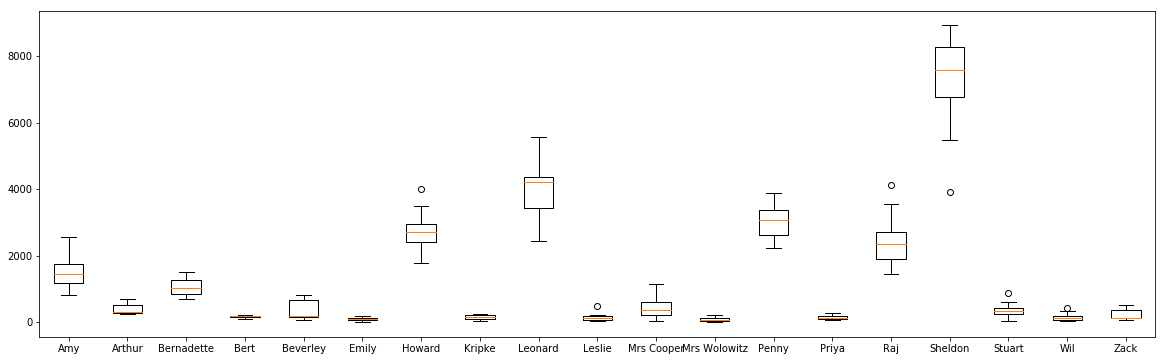

In [61]:
grouped_statistics = pd.DataFrame(df_statistics.groupby('character')['nb_words_per_episode'].apply(list))
distributions = []
for _, row in grouped_statistics.iterrows():
    # remove episodes with 0 counts (ignore them)
    tmp_list = [nb for nb in row.nb_words_per_episode if nb is not 0]
    distributions.append(tmp_list)

plt.figure(figsize = (20, 6))
plt.boxplot(distributions)
ax = plt.gca()
ax.set_xticklabels(grouped_statistics.index.tolist())
plt.show()

Now the character that in average talks the most is Sheldon, followed by Leonard.

This is a better representation because is an average over all the episodes. An episode could have as protagonist a character that talks a lot. But this character is maybe not very active in the other episodes! This representation is therefore better to have a global view on all the episodes.

A further improvement could be to count the number of words by sentence (the sentences length): a character could talk only once with a very vry long sentence! This is implemented in the next code block:

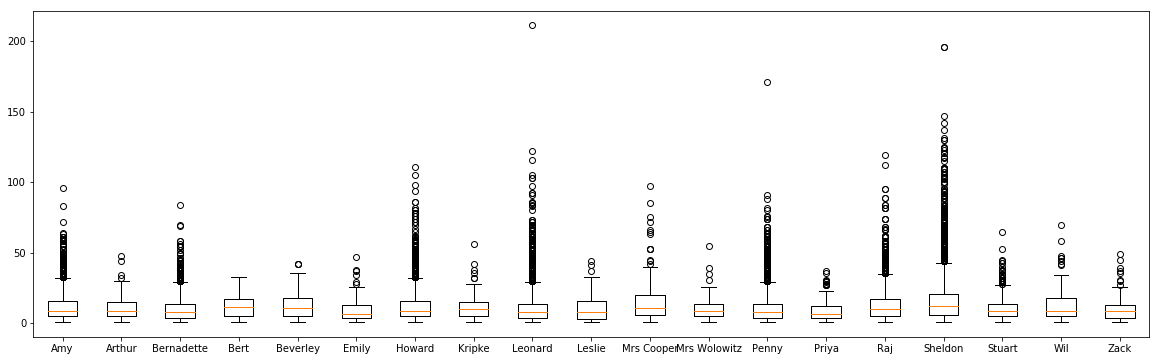

In [83]:
copy_script_df = script_df.copy()
copy_script_df = copy_script_df[copy_script_df.character.isin(recurrent_characters)]
copy_script_df['nb_words_by_char'] = copy_script_df.dialogue.apply(lambda x: x.split()).apply(lambda x: len(x))


grouped_statistics_sentences = pd.DataFrame(copy_script_df.groupby('character')['nb_words_by_char'].apply(list))
distributions = []
for _, row in grouped_statistics_sentences.iterrows():
    # remove episodes with 0 counts (ignore them)
    tmp_list = [nb for nb in row.nb_words_by_char if nb is not 0]
    distributions.append(tmp_list)

plt.figure(figsize = (20, 6))
plt.boxplot(distributions)
ax = plt.gca()
ax.set_xticklabels(grouped_statistics_sentences.index.tolist())
plt.show()


With this new analysis, there is no net difference about the most talkative character. However, Sheldon seems to be the most talkative!

Since the first most talkative character is confirmed, we can be quite confident about that. However, to determine the second most talkative character bootstrapping should for example be performed. By this way, not all the sentences are considered at once (the large number of sentences could mask the real robust statistics number, some sentences could just be short answers like "yes" or " no" and therefore not really representing how much a person "likes to talk")

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [148]:
# !!!!!!!!!!!! put everything to lower_case since in script_df every is lower_case
recurrent_characters_cleaned = [c.lower() for c in recurrent_characters if len(c.split()) == 1]
print('The recurrent characters whose names is composed by a single word are:\n')
print(recurrent_characters_cleaned)

The recurrent characters whose names is composed by a single word are:

['sheldon', 'leonard', 'penny', 'howard', 'raj', 'leslie', 'kripke', 'beverley', 'stuart', 'bernadette', 'wil', 'zack', 'amy', 'priya', 'arthur', 'bert', 'emily']


In [106]:
script_df.head()

,season,episode_nb,episode_name,scene,character,dialogue
0,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point
2,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me
4,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Receptionist,hang on


In [253]:
# familiarity graph

# join all dialogues for each scene
grouped_by_scene = script_df.copy()
grouped_by_scene.character = grouped_by_scene.character.str.lower()
grouped_by_scene = grouped_by_scene[grouped_by_scene.character.isin(recurrent_characters_cleaned)]
grouped_by_scene = pd.DataFrame(grouped_by_scene.groupby(['scene', 'character'])['dialogue'].apply(lambda x: ' '.join(x))).reset_index()
grouped_by_scene['char_in_scene'] = grouped_by_scene.groupby('scene')[['character']].transform(tuple)['character'].apply(list)


In [260]:
familiarity_matrix = np.zeros((len(recurrent_characters_cleaned), len(recurrent_characters_cleaned)))
gossip_matrix      = np.zeros((len(recurrent_characters_cleaned), len(recurrent_characters_cleaned)))

counter_row = 0
for c in recurrent_characters_cleaned:
    for _, row in grouped_by_scene.iterrows():
        counter_col = 0
        for o in recurrent_characters_cleaned:
            if (c in row.character and o in row.dialogue) and (c != o):
                familiarity_matrix[counter_row, counter_col] += 1
            if (c in row.character and o not in row.char_in_scene and o in row.dialogue) and (c != o):
                gossip_matrix[counter_row, counter_col] += 1
            counter_col += 1
    counter_row += 1


In [361]:
print('\n'.join([''.join(['{:7}'.format(item) for item in row]) for row in familiarity_matrix]))

    0.0  235.0  155.0   71.0   55.0    6.0   21.0    3.0   21.0   23.0  161.0    8.0  100.0    9.0    8.0   21.0    3.0
  219.0    0.0  146.0   87.0   61.0   12.0    8.0    3.0   19.0   18.0   63.0    9.0   28.0   15.0    5.0    8.0    4.0
  145.0  150.0    0.0   39.0   41.0    2.0    1.0    1.0   10.0   27.0   52.0   11.0   50.0   11.0    1.0    5.0    3.0
   87.0   54.0   38.0    0.0   64.0    4.0    2.0    0.0   19.0   54.0   49.0    1.0    9.0    3.0    2.0    5.0    9.0
   64.0   45.0   36.0   58.0    0.0    2.0    4.0    0.0   18.0   20.0   46.0    2.0   16.0    6.0    0.0    6.0   18.0
    5.0    7.0    3.0    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    1.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0    2.0    0.0
    4.0    6.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    1.0    0.0    0.0    0.0    0.0
    8.0    4.0    4.0   12.0    6.0    0

In [377]:
print('\n'.join([''.join(['{:7}'.format(item) for item in row]) for row in gossip_matrix]))

    0.0   31.0   33.0   13.0    7.0    2.0    8.0    1.0    6.0    6.0  149.0    5.0   30.0    3.0    2.0   16.0    0.0
   13.0    0.0   37.0    9.0    9.0    3.0    3.0    1.0    7.0    6.0   55.0    1.0    8.0    7.0    2.0    6.0    1.0
   10.0   29.0    0.0    5.0   14.0    1.0    0.0    0.0    3.0    8.0   47.0    2.0    9.0    6.0    0.0    4.0    1.0
    2.0    1.0    7.0    0.0   10.0    1.0    1.0    0.0    2.0   15.0   44.0    0.0    2.0    1.0    2.0    3.0    5.0
    1.0    6.0    5.0    2.0    0.0    1.0    1.0    0.0    3.0    2.0   38.0    0.0    1.0    1.0    0.0    4.0    9.0
    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0    2.0    0.0
    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    1.0    0.0    0

In [161]:
import networkx as nx

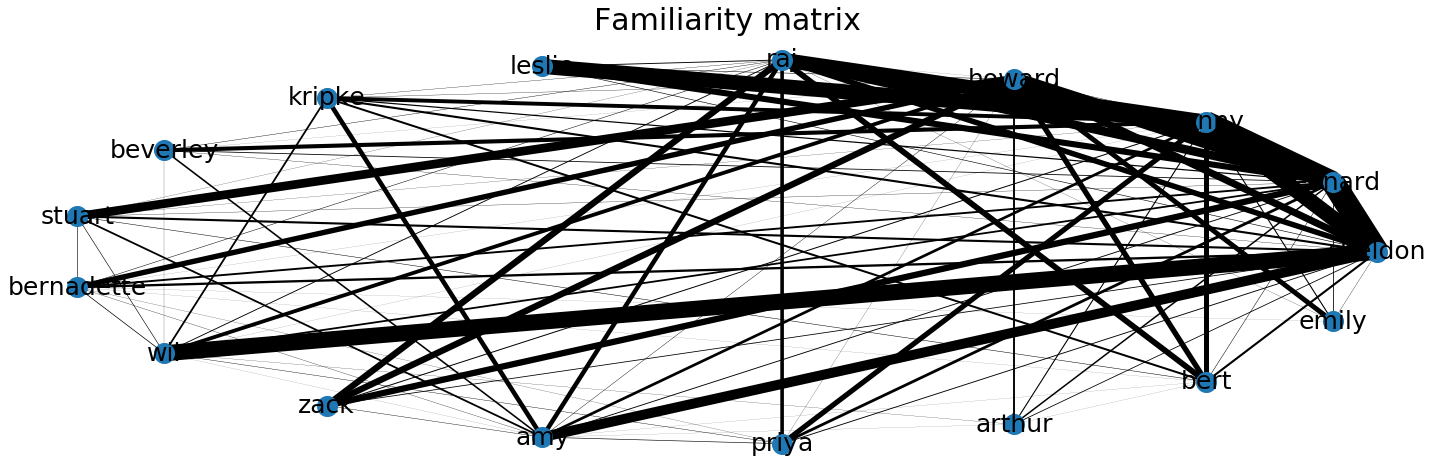

In [368]:
plt.figure(figsize = (20, 6))
G1   = nx.from_numpy_matrix(familiarity_matrix, create_using = nx.DiGraph, parallel_edges = False)
pos = nx.circular_layout(G1)
edges, weights = zip(*nx.get_edge_attributes(G1, 'weight').items())
weights = [w/10 for w in weights]
nodes_labels   = dict(zip(np.arange(0, len(recurrent_characters_cleaned)), recurrent_characters_cleaned))
nx.draw(G1.to_undirected(), pos, 
        node_size = 400, width = weights)
nx.draw_networkx_labels(G1, pos, font_size = 25, labels = labels)

plt.title('Familiarity matrix', size = 30)
plt.show()

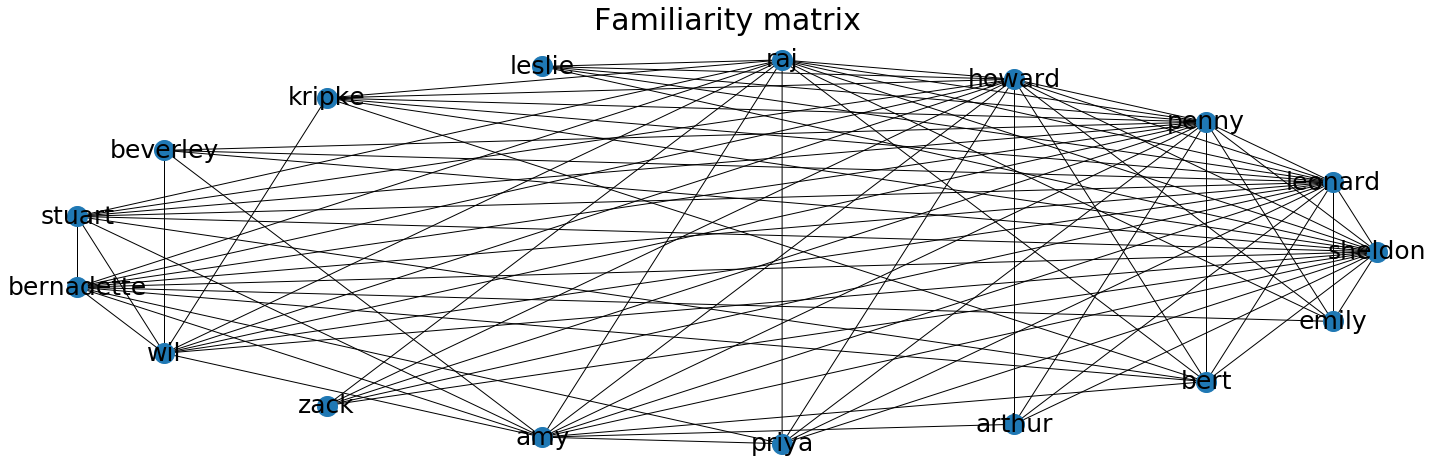

In [356]:
plt.figure(figsize = (20, 6))
G   = nx.from_numpy_matrix(familiarity_matrix, create_using = nx.MultiGraph, parallel_edges = False)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nodes_labels   = dict(zip(np.arange(0, len(recurrent_characters_cleaned)), recurrent_characters_cleaned))
nx.draw(G.to_undirected(), pos, 
        node_size = 400)
nx.draw_networkx_labels(G, pos, font_size = 25, labels = labels)

plt.title('Familiarity matrix', size = 30)
plt.show()

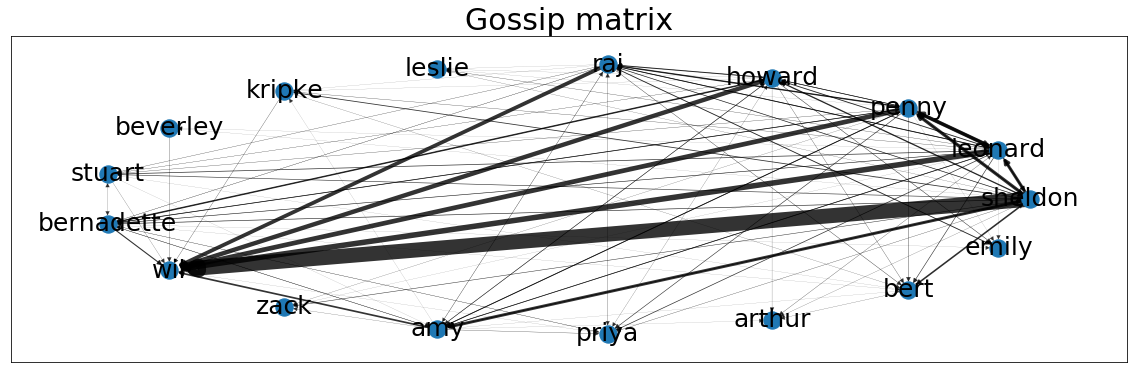

In [378]:
plt.figure(figsize = (20, 6))
G   = nx.from_numpy_matrix(gossip_matrix, create_using = nx.MultiDiGraph, parallel_edges = False)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
weights = [w/10 for w in weights]
nodes_labels   = dict(zip(np.arange(0, len(recurrent_characters_cleaned)), recurrent_characters_cleaned))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, width = weights, arrows = True, arowsize = weights, alpha = 0.8)
nx.draw_networkx_labels(G, pos, font_size = 25, labels = labels)


plt.title('Gossip matrix', size = 30)
plt.show()

In [ ]:
'''
plt.figure(figsize = (20, 6))
G   = nx.from_numpy_matrix(familiarity_matrix, create_using=nx.nx.MultiGraph, parallel_edges = False)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nodes_labels   = dict(zip(np.arange(0, len(recurrent_characters_cleaned)), recurrent_characters_cleaned))
nx.draw(G.to_undirected(), pos, edge_color = weights, 
        edge_cmap = plt.cm.Reds, with_labels = True, 
        labels = nodes_labels, node_size = 400)
nx.draw_networkx_labels(G, pos, font_size = 20, labels = labels)
plt.show()
'''

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

--> This is not true, not everyone is connected to everyone else! At most 1 intermediate is needed

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [373]:
print(recurrent_characters_cleaned)
print('')

centrality = nx.betweenness_centrality(G1)
centrality


['sheldon', 'leonard', 'penny', 'howard', 'raj', 'leslie', 'kripke', 'beverley', 'stuart', 'bernadette', 'wil', 'zack', 'amy', 'priya', 'arthur', 'bert', 'emily']



{0: 0.11848214285714286,
 1: 0.11070436507936507,
 2: 0.09264880952380952,
 3: 0.07959325396825397,
 4: 0.037023809523809514,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.004662698412698413,
 10: 0.005595238095238095,
 11: 0.0,
 12: 0.04073412698412698,
 13: 0.0,
 14: 0.0020833333333333333,
 15: 0.004305555555555555,
 16: 0.0}

The betweeness centrality is the appropriate measure. In fact, betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

Based on this criterium, the character through whom the largest number of these indirect familiarities happen is located at node 0: Sheldon!

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

The graphs displaying this property are named "complete digraphs". Moreover, the binary matrix (where 1-elements corresponds to at least a weight of 1) should be symmetric to have the dual-direction gossip property claimed by Sheldon.

It can be clearly observed that the gossip graph does not possess this property!

If for every pair of recurrent characters, at least one gossips about the other. the nodes of the graphs should all be connected, at least in one direction. 


**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

A very simple method is the following:

- If a character i has gossiped about another character j, the entry (i, j) of the matrix familiarity_matrix is not null.
- If a character i knows another character j, the entry (i, j) of the matrix gossip_matrix is not null.

By intersecting the 2 matrices, the couples (i, j) that gossiped about one of the 2 persons and that knows each other, will have a non-zero entry in the combined matrix. The same for the couples that do not know each other and that do not gossip one about the other. Using binary operations, those entries have a true index.

In [382]:
binarized_familiarity = familiarity_matrix >= 1
binarized_gossip      = gossip_matrix >= 1

intersection = binarized_familiarity & binarized_gossip
intersection

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True, False,  True,  True],
       [ True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True, False,  True,
         True,  True, False,  True,  True, False,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False,  True, False],
       [False, False, False, False, False, False

It can be observed that we don't have only True indexes. Thestatement "for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other" is therefore false.

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [14]:
display(script_df.head(2))
all_seasons = script_df.season.unique().tolist()

,season,episode_nb,episode_name,scene,character,dialogue
0,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,Series 01,Episode 01,Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point


In [15]:
train_set  = script_df[script_df.season.isin(all_seasons[0:-2])]
train_set  = train_set[['character', 'dialogue']]
test_set   = script_df[script_df.season.isin(all_seasons[-2:])]
test_set   = test_set[['character', 'dialogue']]

stop_words_list = pd.read_csv('./helpers/stopwords.txt', header = None, names = ['stopwords']).stopwords.tolist()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(stop_words = stop_words_list, tokenizer = simple_tokeniser, min_df = 2)

# create TF-IDF representation of all the data-points (all the dialogue lines)
tf_idf_train    = vectorizer.fit_transform(train_set.dialogue.tolist()).toarray()
tf_idf_train_df = pd.DataFrame(tf_idf_train, index = train_set.character, columns = vectorizer.get_feature_names())
tf_idf_test     = vectorizer.fit_transform(test_set.dialogue.tolist()).toarray()
tf_idf_test_df  = pd.DataFrame(tf_idf_test, index = test_set.character, columns = vectorizer.get_feature_names())

tf_idf_train_df.head()

,0,00,000,0400,05,06,1,10,100,101,...,“penny,“soft,“the,“wesley”,“what,“with,“you,”,…,♪
character,,,,,,,,,,,,,,,,,,,,,
Sheldon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leonard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sheldon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leonard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Receptionist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [18]:
tmp = recurrent_characters

In [19]:
train_set_Sheldon_words = tf_idf_train_df[tf_idf_train_df.index == 'Sheldon']
train_set_Sheldon_words = train_set_Sheldon_words.loc[:, (train_set_Sheldon_words > 0).any()].columns.tolist()

others = recurrent_characters.copy()
others.remove('Sheldon')
train_set_Others_words  = tf_idf_train_df[tf_idf_train_df.index.isin(others)]
train_set_Others_words  = train_set_Others_words.loc[:, (train_set_Others_words > 0).any()].columns.tolist()

# intersect the 2 lists:
intersection = list(set(train_set_Sheldon_words) & set(train_set_Others_words))


In [20]:
print('The %.2f%% of the words said by sheldon are also said by all the other characters.'%((len(intersection)/len(train_set_Sheldon_words))*100))


The 83.88% of the words said by sheldon are also said by all the other characters.


Method: find all the pre-processed words said by sheldon and by the other characters. Intersect the 2 lists and see if there are some words that are unique to Sheldon.

The previous result shows that some words are said uniquely by Sheldon in the train set! Its should therefore be possible to identify some of the Sheldon sentences.

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV

In [24]:
# use svd decomposition to reduce features dimensionality to only 25

svd_train        = TruncatedSVD(n_components = 25, random_state = 1)
svd_train_matrix = svd_train.fit_transform(tf_idf_train)

svd_test         = TruncatedSVD(n_components = 25, random_state = 1)
svd_test_matrix  = svd_test.fit_transform(tf_idf_test)

In [25]:
train_labels = train_set.character.tolist()
train_labels = [x if x == 'Sheldon' else 'Others' for x in train_labels ]
test_labels  = test_set.character.tolist()
test_labels  = [x if x == 'Sheldon' else 'Others' for x in test_labels ]

In [26]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(svd_train_matrix, train_labels)

train_prediction = clf.predict(svd_train_matrix)
test_prediction  = clf.predict(svd_test_matrix)

In [31]:
def confusion_matrix_measures(y_true, y_pred, label):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    vect = []
    for i in range(len(y_pred)): 
        if y_true[i] == y_pred[i] == label:
            tp += 1
            vect += ['tp']
        if y_pred[i] == label and y_true[i] != y_pred[i]:
            fp += 1
            vect += ['fp']
        if y_true[i] == y_pred[i] != label:
            tn += 1
            vect += ['tn']
        if y_pred[i] != label and y_true[i] != y_pred[i]:
            fn += 1
            vect += ['fn']

    return tp, fp, tn, fn, vect


def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

def f1_score(tp, fp, fn):
    return 2*tp/(2*tp + fp + fn)

def accuracy(tp, tn, fp, fn):
    return (tp + tn)/(tp + tn + fp + fn)

In [46]:
confusion_vector_Sheldon = None
confusion_vector_Others = None


for t in ['Train', 'Test']:
    print('\n%s:'%(t))
    for i in ['Sheldon', 'Others']:
        if t == 'Train':
            tp, fp, tn, fn, vect = confusion_matrix_measures(train_labels, train_prediction, i)
            if i == 'Sheldon':
                confusion_vector_Sheldon = vect
            else:
                confusion_vector_Others = vect
        else:
            tp, fp, tn, fn, vect = confusion_matrix_measures(test_labels, test_prediction, i)
        prec = precision(tp, fp)
        rec = recall(tp, fn)
        f1_s = f1_score(tp, fp, fn)
        acc = accuracy(tp, tn, fp, fn)
        print('%-10s precision: %f, recall: %f, f1-score: %f, accuracy: %f'%(i, prec, rec, f1_s, acc))


Train:
Sheldon    precision: 0.529183, recall: 0.013410, f1-score: 0.026156, accuracy: 0.760557
Others     precision: 0.761972, recall: 0.996237, f1-score: 0.863497, accuracy: 0.760557

Test:
Sheldon    precision: 0.131148, recall: 0.003304, f1-score: 0.006446, accuracy: 0.786918
Others     precision: 0.790393, recall: 0.994209, f1-score: 0.880662, accuracy: 0.786918


- The performances of the test set are lower in terms of precision, recall, f1-score for sheldon, respect to the train -set. This could be the sign of overfitting.
- The accuracy is similar between train and test sets and is quite high!
- For unevely distributed classess, the f1 score is often the most useful evaluation criterium. It can be seen that for Sheldon it is very low, especially in the train set! It is however quite high for the Others class. This means that the classifier mostly assign labels correctly for the non-sheldon class!

From the previous remarks, we can conclude that:
- Leonard was right by stating that the accuracy Sheldon claims is unattainable.
- Leonard's suspicions that it's easier for Sheldon to distinguish the lines that aren't his, rather than those that are is also right!

In [30]:
print(clf.classes_)

['Others' 'Sheldon']


In [48]:
prob    = clf.predict_proba(svd_train_matrix)
df_prob = pd.DataFrame({'prob_Sheldon': prob[:, 0], 'prob_Others': prob[:, 1],
                        'label': train_labels, 'confusion_Sheldon': confusion_vector_Sheldon,
                       'confusion_Others': confusion_vector_Others})

df_prob.head()

,prob_Sheldon,prob_Others,label,confusion_Sheldon,confusion_Others
0,0.747964,0.252036,Sheldon,fn,fp
1,0.723676,0.276324,Others,tn,tp
2,0.761171,0.238829,Sheldon,fn,fp
3,0.717045,0.282955,Others,tn,tp
4,0.731708,0.268292,Others,tn,tp


In [ ]:
fp_sheldon = df_prob[df_prob.confusion_Sheldon == 'fp'].sort_values(by = 'prob_Sheldon', ascending = False).loc[0:10]
print('\nThe top 10 most extreme training false positives (for Sheldon), in terms of the probabilities predicted by the logistic regression model are:')
display(fp_sheldon)

In [58]:
fn_sheldon = df_prob[df_prob.confusion_Sheldon == 'fn'].sort_values(by = 'prob_Sheldon', ascending = False)
fn_sheldon = fn_sheldon[['prob_Sheldon', 'label', 'confusion_Sheldon']].iloc[0:10]
print('\nThe top 10 most extreme training false negatives (for Sheldon), in terms of the probabilities predicted by the logistic regression model are:')
display(fn_sheldon)

fp_sheldon = df_prob[df_prob.confusion_Sheldon == 'fp'].sort_values(by = 'prob_Sheldon', ascending = False)
fp_sheldon = fp_sheldon[['prob_Sheldon', 'label', 'confusion_Sheldon']].iloc[0:10]
print('\nThe top 10 most extreme training false positives (for Sheldon), in terms of the probabilities predicted by the logistic regression model are:')
display(fp_sheldon)


The top 10 most extreme training false negatives (for Sheldon), in terms of the probabilities predicted by the logistic regression model are:


,prob_Sheldon,label,confusion_Sheldon
19820,0.999286,Sheldon,fn
2900,0.999286,Sheldon,fn
1692,0.998411,Sheldon,fn
12382,0.998411,Sheldon,fn
8236,0.998411,Sheldon,fn
38599,0.998353,Sheldon,fn
12561,0.995593,Sheldon,fn
18455,0.992998,Sheldon,fn
31813,0.986620,Sheldon,fn
31812,0.986620,Sheldon,fn



The top 10 most extreme training false positives (for Sheldon), in terms of the probabilities predicted by the logistic regression model are:


,prob_Sheldon,label,confusion_Sheldon
31422,0.495336,Others,fp
31423,0.495336,Others,fp
40665,0.495336,Others,fp
41214,0.495099,Others,fp
15976,0.495099,Others,fp
13964,0.494996,Others,fp
18867,0.494821,Others,fp
23406,0.494455,Others,fp
34823,0.493078,Others,fp
22141,0.492839,Others,fp


We notice that the top 10 most extreme probabilities of the training false negative for Sheldon are much higher than the top 10 most extreme false positive!

This means that sheldon predicts false negatives with an higher probability, therefore he makes more mistakes in the prediction of sentences said by himself! The previous conclusions are confirmed.

In [65]:
svd_train  = TruncatedSVD(n_components = 25, random_state = 1).fit(tf_idf_train)
components = svd_train.components_

In [73]:
print('There are %.0f dialogues in the training set'%(train_set.shape[0]))
print('The dimension of the tf_idf_train matrix is')
print(tf_idf_train.shape)
print('This means that there are %.0f words after pre-processing'%(tf_idf_train.shape[1]))

sigma = svd_train.singular_values_
print('\nSigma matrix (of SVD decomposition) dimensions - number of principal components:')
print(sigma.shape)
print(sigma)
print('\nComponents matrix size:')
print(components.shape)

There are 42294 dialogues in the training set
The dimension of the tf_idf_train matrix is
(42294, 11411)
This means that there are 11411 words after pre-processing

Sigma matrix (of SVD decomposition) dimensions - number of principal components:
(25,)
[19.86478535 17.90139818 16.75655983 16.37140644 16.22206966 15.74428422
 15.38727003 15.13961292 15.10075952 14.90026056 14.46088574 14.27090438
 14.06001876 13.76807173 13.66592667 13.65794534 13.4183088  13.22788265
 12.87194635 12.65529475 12.48367699 12.21537986 12.04392027 11.98337507
 11.82344914]

Components matrix size:
(25, 11411)


The importance is captured by the singlular values of sigma. The most important feature is therefore the one associated to the highest value (the first one). We projected the 42294 dimensional space into a 25-dimensional space. Each dimension is a combination of original dialogues rows.

the model components are the set of all eigenvectors for the projection space. By taking the component associated to thehighest sigma value, we can extract the 5 most important words!!

In [85]:
top_df = pd.DataFrame({'comp': components[0], 'words': tf_idf_train_df.columns.tolist()}).sort_values(by = 'comp', ascending = False)

print('The 5 most important words are:')
display(top_df.iloc[0:5].reset_index())

The 5 most important words are:


,index,comp,words
0,4768,0.356918,hey
1,8990,0.355523,sheldon
2,5630,0.354607,know
3,11051,0.237347,well
4,8497,0.229755,right


In [88]:
# easier way to do this:
top_words = [tf_idf_train_df.columns.tolist()[i] for i in components[0].argsort()[::-1]]

print('The 5 most important words are:')
print(top_words[0:5])

The 5 most important words are:
['hey', 'sheldon', 'know', 'well', 'right']
